In [3]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

In [4]:
cc = pd.read_csv(r"C:\Users\Prathamesh\Downloads\Car24_project\cars_24_combined.csv")
cc.head()

,Unnamed: 0,Car Name,Year,Distance,Owner,Fuel,Location,Drive,Type,Price
0,0,Maruti S PRESSO,2022.0,3878,1,PETROL,HR-98,Manual,HatchBack,514000
1,1,Hyundai Xcent,2018.0,32041,1,PETROL,TN-22,Manual,Sedan,674000
2,2,Tata Safari,2021.0,96339,1,DIESEL,TS-08,Automatic,SUV,1952000
3,3,Maruti Vitara Brezza,2019.0,51718,1,DIESEL,WB-24,Manual,SUV,690000
4,4,Tata Tiago,2021.0,19811,1,PETROL,HR-51,Manual,HatchBack,526000


In [5]:
# cc['Car Name'].unique()

In [6]:
cc.shape

(8015, 10)

In [7]:
cc.columns

Index(['Unnamed: 0', 'Car Name', 'Year', 'Distance', 'Owner', 'Fuel',
       'Location', 'Drive', 'Type', 'Price'],
      dtype='object')

In [8]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8015 entries, 0 to 8014
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8015 non-null   int64  
 1   Car Name    8014 non-null   object 
 2   Year        8014 non-null   float64
 3   Distance    8015 non-null   int64  
 4   Owner       8015 non-null   int64  
 5   Fuel        8015 non-null   object 
 6   Location    7802 non-null   object 
 7   Drive       8015 non-null   object 
 8   Type        8015 non-null   object 
 9   Price       8015 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 626.3+ KB


In [9]:
cc.isnull().sum()[cc.isnull().sum() > 0]

Car Name      1
Year          1
Location    213
dtype: int64

In [10]:
cc['Car Name'].fillna('Maruti Swift' , inplace = True)
cc['Year'].fillna(2018.0 , inplace = True)
cc['Location'].fillna('unknown' , inplace = True)

In [11]:
# cc['Location'].value_counts()

In [12]:
cc.select_dtypes(include = 'object').columns

Index(['Car Name', 'Fuel', 'Location', 'Drive', 'Type'], dtype='object')

In [13]:
cc = cc.drop({'Unnamed: 0'},axis = 1)

In [15]:
cc['Type'].unique()

array(['HatchBack', 'Sedan', 'SUV', 'Lux_SUV', 'Lux_sedan'], dtype=object)

In [27]:
cc_owner = pd.DataFrame(cc.groupby(['Year','Owner']).Price.sum().reset_index())

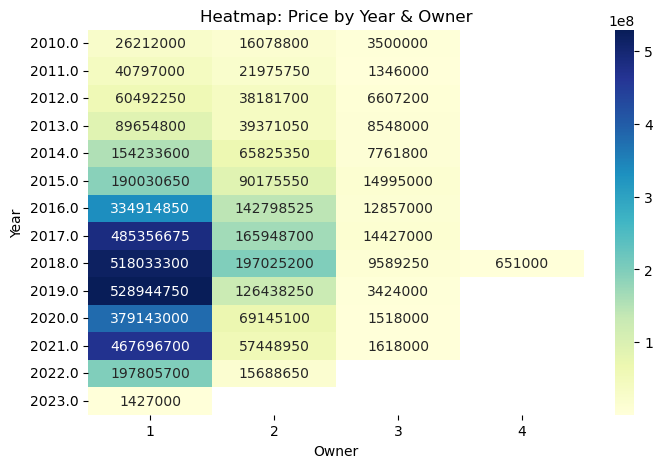

In [29]:
pivot = cc_owner.pivot(index='Year', columns='Owner', values='Price')

plt.figure(figsize=(8,5))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")

plt.title("Heatmap: Price by Year & Owner")
plt.show()

In [31]:
cc_names = pd.DataFrame(cc.groupby(['Car Name']).Price.sum())
cc_names = cc_names.sort_values(by = 'Price' , ascending = False)
cc_names = cc_names.head(10)

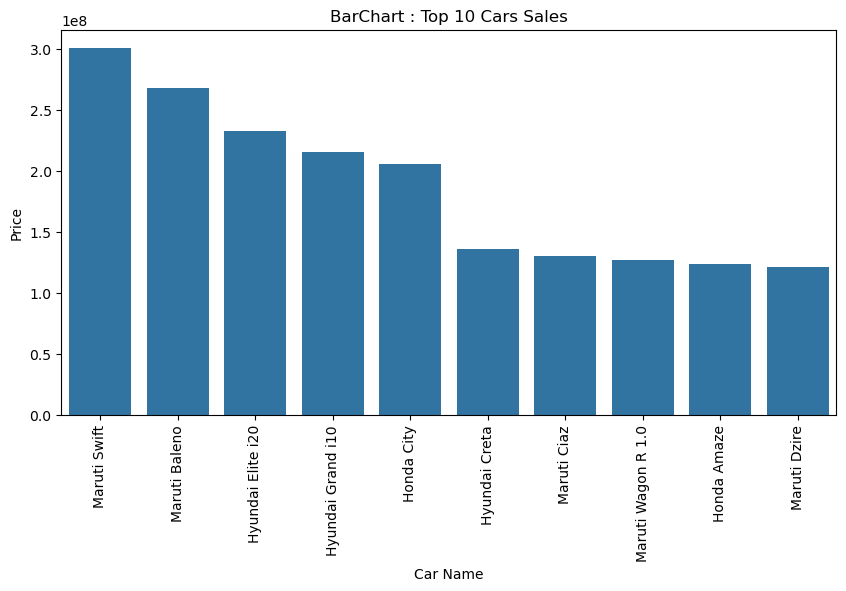

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(data=cc_names, x='Car Name', y='Price')
plt.title("BarChart : Top 10 Cars Sales")
plt.xticks(rotation=90)
plt.show()

In [35]:
cc_types = pd.DataFrame(cc.groupby(['Type']).Price.sum())
cc_type = cc_types.sort_values(by = 'Price' , ascending = False)
cc_type

,Price
Type,
HatchBack,2377984950
Sedan,1055913150
SUV,1020353200
Lux_SUV,99755550
Lux_sedan,53679250


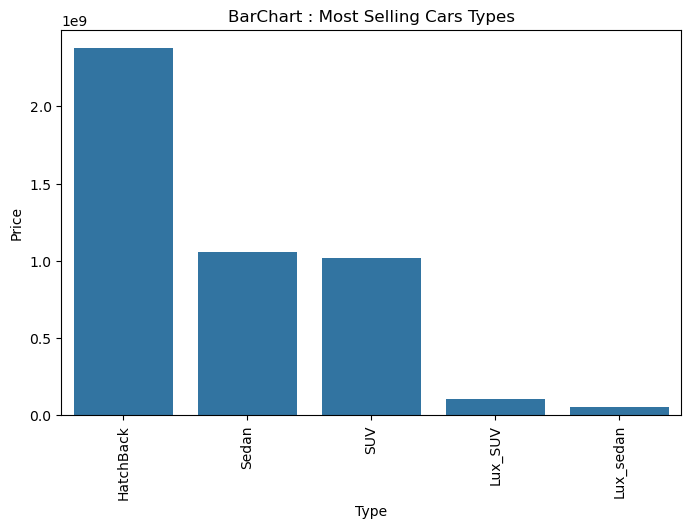

In [37]:
plt.figure(figsize=(8,5))
sns.barplot(data=cc_type, x='Type', y='Price')
plt.title("BarChart : Most Selling Cars Types")
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, 'Price')

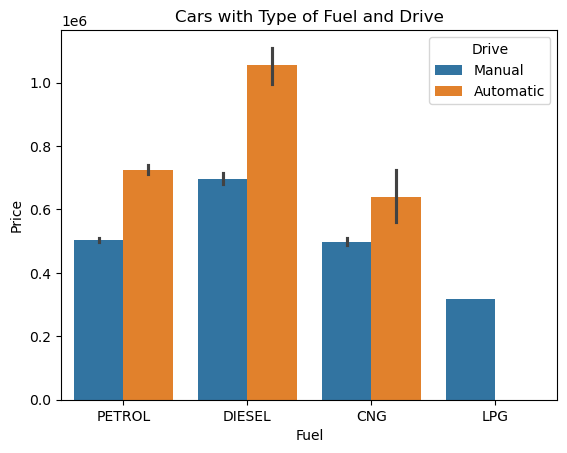

In [39]:
sns.barplot(x = 'Fuel' , y = 'Price' ,data = cc, hue = 'Drive')
plt.title('Cars with Type of Fuel and Drive')
plt.xlabel('Fuel')
plt.ylabel('Price')

In [41]:
le = LabelEncoder()
cc[cc.select_dtypes(include = 'object').columns] = cc[cc.select_dtypes(include = 'object').columns].apply(le.fit_transform)

In [43]:
x = cc.drop({'Price'} , axis = 1)
y = cc['Price']

In [45]:
x_train, x_test , y_train, y_test = train_test_split(x , y , test_size = .2)

In [47]:
x_test.head()

,Car Name,Year,Distance,Owner,Fuel,Location,Drive,Type
2611,72,2010.0,86997,1,1,107,1,0
4145,27,2020.0,19168,1,3,209,1,0
7172,63,2017.0,49450,2,3,314,0,0
4798,65,2020.0,66754,1,3,197,1,4
1427,20,2021.0,24849,1,3,90,1,3


In [49]:
y_test.head()

2611     329000
4145     476000
7172     439000
4798     620000
1427    1175000
Name: Price, dtype: int64

In [91]:
rfr = RandomForestRegressor(n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features="sqrt",
    bootstrap=True,
    random_state=42)
rfr.fit(x_train , y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=300, random_state=42)

In [92]:
pred_train = rfr.predict(x_train)
pred_train
print(r2_score(y_train , pred_train))

0.8927256800447764


In [93]:
pred_test = rfr.predict(x_test)
pred_test
print(r2_score(y_test, pred_test))

0.7676284793783652


In [97]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rfr, x, y, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", cv_scores)
print("Average CV R²:", cv_scores.mean())


Cross-Validation R² Scores: [0.77024047 0.78589181 0.755203   0.76448525 0.74102389]
Average CV R²: 0.7633688844663647


In [99]:
mape = mean_absolute_percentage_error(y_test , pred_test)
mse = mean_squared_error(y_test , pred_test)
print(mape, "          " , mse)

0.15067538527459093            17370136862.41889


In [101]:
x_train.columns

Index(['Car Name', 'Year', 'Distance', 'Owner', 'Fuel', 'Location', 'Drive',
       'Type'],
      dtype='object')

In [103]:
rfr.feature_importances_

array([0.15006488, 0.20926143, 0.11285687, 0.01292294, 0.04359037,
       0.0725729 , 0.09191677, 0.30681382])

In [105]:
feat_imp = pd.DataFrame()
feat_imp['Features'] = x_train.columns
feat_imp['Imp'] = rfr.feature_importances_
feat_imp = feat_imp.sort_values('Imp' , ascending = False)
feat_imp

,Features,Imp
7,Type,0.306814
1,Year,0.209261
0,Car Name,0.150065
2,Distance,0.112857
6,Drive,0.091917
5,Location,0.072573
4,Fuel,0.043590
3,Owner,0.012923


In [107]:
import pickle

filename = "trained_model.pkl"      # name of the pickle file
with open(filename, 'wb') as file:
    pickle.dump(rfr, file)

print("Model saved as:", filename)


Model saved as: trained_model.pkl


In [109]:
import pickle

with open("trained_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully")


Model loaded successfully
